In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation  import train_test_split 
from sklearn.metrics import mean_squared_error 
#本程序是一个曲线拟合的示例
#将分别利用一阶、二阶、四阶多项式对曲线进行拟合

#生成原始数据样本
x = np.arange(0.1,1.2,0.1) 
noice = 0.06*np.random.standard_normal((1, len(x)))
y = -1.5*(x-0.9)**2+1 + noice
y = y[0]

#原始数据分类训练集与测试集两类
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.4,random_state= 666)


#两重要超参数的初始化
learning_rate = 0.5 #学习率
iter_num =10000     #模型的迭代次数

#初始化训练步步骤列表
Epoch = []
###############################         1阶拟合      ####################################
#定义利用梯度下降更新参数函数
def Updata1(x1,y,theta,learning_rate):
    m = len(x1)   #样本数
    #两求和临时变量
    sum1 = 0.0
    sum2 = 0.0
    #特征作归一化处理 
    n_x1 = (x1 - x1.mean())/x1.std()
    
    alpha = learning_rate #学习率
    h = 0
    for i in range(m):
        h = theta[0] + theta[1] * x1[i]
        sum1 += (h - y[i])
        sum2 += (h - y[i]) * n_x1[i]
    #梯度下降
    theta[0] -= alpha * sum1 / m 
    theta[1] -= alpha * sum2 / m 
    return theta
#定义优化器，优化后输出最佳参数值
def Optimization1(x1,y,theta,learning_rate):
    for epoch in range(iter_num):
        theta = Updata1(x1,y,theta,learning_rate)
        if epoch %100 == 0: 
            Epoch.append(epoch)
            #计算训练误差
            predit_train = theta[0] + x_train * theta[1]
            train_MSE = mean_squared_error(y_train,predit_train)
            train_loss1.append(train_MSE)
            #计算测试误差
            predit_test = theta[0] + x_test * theta[1]
            test_MSE = mean_squared_error(y_test,predit_test)
            test_loss1.append(test_MSE)
            
    return theta

#训练数据初始化

x1 = x_train#将原始x数据赋给feature x1，后面到高阶的时候还有x2, x3, x4 
theta1 = [0,0]  #权值
train_loss1 = []
test_loss1 = []

#进行训练得到最佳权值
theta1 = Optimization1(x1,y_train,theta1,learning_rate)
###############################         2阶拟合      ####################################
#定义利用梯度下降更新参数函数 
def Updata2(x1,x2,y,theta,learning_rate):
    m = len(x1)   #样本数
    sum1 = 0.0
    sum2 = 0.0
    sum3 = 0.0
    #特征作归一化处理 
    n_x1 = (x1 - x1.mean())/x1.std()
    n_x2 = (x2 - x2.mean())/x2.std()

    
    alpha = learning_rate #学习率
    h = 0
    for i in range(m):
        h = theta[0] + theta[1] * x1[i] +theta[2] * x2[i]
        sum1 += (h - y[i])
        sum2 += (h - y[i]) * n_x1[i]
        sum3 += (h - y[i]) * n_x2[i]
    #梯度下降
    theta[0] -= alpha * sum1 / m 
    theta[1] -= alpha * sum2 / m 
    theta[2] -= alpha * sum3 / m 
    return theta
#定义优化器，优化后输出最佳参数值
def Optimization2(x1,x2,y,theta,learning_rate):
    for epoch in range(iter_num):
        theta = Updata2(x1,x2,y,theta,learning_rate)
        if epoch %100 == 0:  
            #计算训练误差
            predit_train = theta[0] + x_train * theta[1] + x_train ** 2 * theta[2]
            train_MSE = mean_squared_error(y_train,predit_train)
            train_loss2.append(train_MSE)
            #计算测试误差
            predit_test = theta[0] + x_test * theta[1] + x_test ** 2 * theta[2]
            test_MSE = mean_squared_error(y_test,predit_test)
            test_loss2.append(test_MSE)
            
    return theta

#训练数据初始化
#将 x^2 当做线性回归的第二个feature
x2 = x_train * x_train
theta2 = [0,0,0]  #权值
train_loss2 = []
test_loss2 = []
#进行训练得到最佳权值
theta2 = Optimization2(x1,x2,y_train,theta2,learning_rate)
###############################         4阶拟合      ####################################
    
#定义利用梯度下降更新参数函数 
def Updata4(x1,x2,x3,x4,y,theta,learning_rate):
    
    m = len(x1)   #样本数
    sum1 = 0.0
    sum2 = 0.0
    sum3 = 0.0
    sum4 = 0.0
    sum5 = 0.0
    #特征作归一化处理 
    

    n_x1 = (x1 - np.mean(x1))/np.std(x1)
    n_x2 = (x2 - np.mean(x2))/np.std(x2)
    n_x3 = (x3 - np.mean(x3))/np.std(x3)
    n_x4 = (x4 - np.mean(x4))/np.std(x4) 
     
    alpha = learning_rate #学习率
    h = 0
    for i in range(m):
        h = theta[0] + theta[1] * x1[i] + theta[2] * x2[i] + theta[3] * x3[i] + theta[4] * x4[i]
        sum1 += (h - y[i])
        sum2 += (h - y[i]) * n_x1[i]
        sum3 += (h - y[i]) * n_x2[i]
        sum4 += (h - y[i]) * n_x3[i]
        sum5 += (h - y[i]) * n_x4[i]
    #梯度下降
    theta[0] -= alpha * sum1 / m 
    theta[1] -= alpha * sum2 / m 
    theta[2] -= alpha * sum3 / m     
    theta[3] -= alpha * sum4 / m 
    theta[4] -= alpha * sum5 / m 
    return theta
#定义优化器，优化后输出最佳参数值

def Optimization4(x1,x2,x3,x4,y,theta,learning_rate):
    for epoch in range(iter_num):
        theta = Updata4(x1,x2,x3,x4,y,theta,learning_rate)
        if epoch %100 == 0:  
            #计算训练误差
            predit_train = theta[0] + x_train * theta[1] + x_train ** 2 * theta[2] + x_train ** 3 * theta[3] + x_train ** 4 * theta[4]
                                    
            train_MSE = mean_squared_error(y_train,predit_train)
            train_loss4.append(train_MSE)
            #计算测试误差
            predit_test = theta[0] + x_test * theta[1] + x_test ** 2 * theta[2] + x_test ** 3 * theta[3] + x_test ** 4 * theta[4]
                                  
            test_MSE = mean_squared_error(y_test,predit_test)
            test_loss4.append(test_MSE)
        
    return theta

#训练数据初始化

#将x^3当做线性回归的第3个feature
x3 = x_train * x_train *x_train
#将x^4当做线性回归的第4个feature
x4 = x_train * x_train *x_train * x_train
theta4 = [0,0,0,0,0]  #权值

train_loss4 = []
test_loss4 = []

#进行训练得到最佳权值

theta4 = Optimization4(x1,x2,x3,x4,y_train,theta4,learning_rate)




#以上程序的目的是获得theta1,theta2,theta3这三个已经优化好的权重参数
###############################################     作图     ##############################################
xx = np.arange(0,1.2,0.01)  
yy = theta1[0] + xx * theta1[1] # 计算每个点对应的y
yy_poly2 = theta2[0] + xx * theta2[1] + xx ** 2 * theta2[2]  # 计算每个点对应的y
yy_poly4 = theta4[0] + xx * theta4[1] + xx ** 2 * theta4[2] + xx ** 3 * theta4[3] + xx ** 4 * theta4[4]  # 计算每个点对应的y


plt.scatter(x_train, y_train)
plt1, = plt.plot(xx, yy, label="Degree1")
plt2, = plt.plot(xx, yy_poly2, label="Degree2")
plt4, = plt.plot(xx, yy_poly4, label="Degree4")
plt.axis([0, 1.2, 0, 1.2])
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(handles=[plt1, plt2, plt4])
plt.show()


ModuleNotFoundError: No module named 'sklearn.cross_validation'

观察可以发现，4阶多项式的过拟合现象也不是很明显，下面绘制三种模型下的训练与测试曲线：

In [2]:
#绘制一阶训练曲线
plt1, = plt.plot(Epoch,train_loss1,label="Train")
plt2, = plt.plot(Epoch,test_loss1,label="Test")
plt.legend(handles=[plt1, plt2])
plt.xlabel("epoch")
plt.ylabel("MSE")
plt.axis([0, 4000, 0, 0.2])
plt.title("Degree1 fitting")
plt.show()

#绘制二阶训练曲线
plt1, = plt.plot(Epoch,train_loss2,label="Train")
plt2, = plt.plot(Epoch,test_loss2,label="Test")
plt.legend(handles=[plt1, plt2])
plt.xlabel("epoch")
plt.ylabel("MSE")
plt.axis([0, 4000, 0, 0.15])
plt.title("Degree2 fitting")
plt.show()

#绘制四阶训练曲线
plt1, = plt.plot(Epoch,train_loss4,label="Train")
plt2, = plt.plot(Epoch,test_loss4,label="Test")
plt.legend(handles=[plt1, plt2])
plt.xlabel("epoch")
plt.ylabel("MSE")
plt.axis([0, 4000, 0, 0.1])
plt.title("Degree4 fitting")
plt.show()

NameError: name 'Epoch' is not defined

对比三个模型可以发现，4阶拟合稍微出现了一点过拟合现象，但不明显。下面将导入LinearRegression模块进行更高阶的拟合以展示过拟合现象。

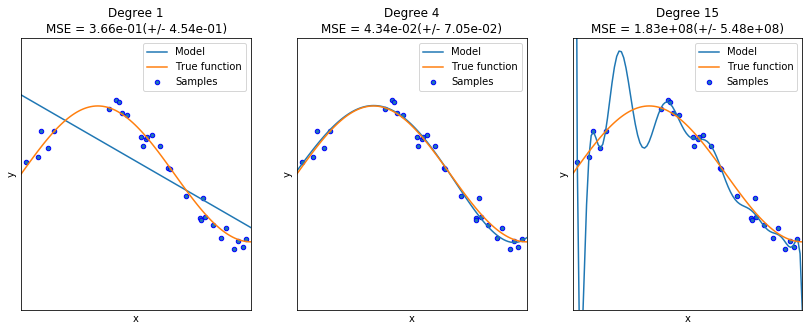

In [3]:
#本程序旨在展示欠拟合、合适拟合、过拟合三种状态
#这里直接调用LinearRegression模块进行拟合，故未给出详细拟合细节
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

#实际待拟合的函数
def true_fun(X):
    return np.sin(1.5 * np.pi * X)
 
np.random.seed(0)
 
n_samples = 30 
#拟合模型的阶数
degrees = [1, 4, 15]
 
X = np.sort(np.random.rand(n_samples))                    #产生随机样本，并进行排序
y = true_fun(X) + np.random.randn(n_samples) * 0.1        #在真实函数的基础上添加噪声
 
plt.figure(figsize=(14, 5))#设置图像的大小

#用i遍历三种模型
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)              #分配显示图
    plt.setp(ax, xticks=(), yticks=())
    #分别生成1次、4次、15次多项式  #注意生成的向量不含偏置项
    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False) 
    
    linear_regression = LinearRegression()
    # pipeline将数据处理和模型拟合结合在一起
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    #由于多项式拟合的输入时二维的，必须对X添加多一个维度
    pipeline.fit(X[:, np.newaxis], y)
 
    # 使用交叉验证评估模型
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)
    #绘制结果图
    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

观察这三幅图，图一明显拟合不足，图二与真实曲线相像，图三出现过拟合，它的特征是能够完美的拟合训练数据点，但具有较差的泛化能力